# Projectile Motion

In [ ]:
Pkg.update()
Pkg.add("PyPlot")
using PyPlot
#using Gadfly

INFO: Updating METADATA...
INFO: Updating cache of DataFrames...
INFO: Updating cache of Loess...
INFO: Updating cache of Compose...
INFO: Updating cache of Showoff...
INFO: Updating cache of DataFrames...
INFO: Computing changes...
INFO: Upgrading Compose: v0.4.5 => v0.5.0
INFO: Upgrading Loess: v0.1.0 => v0.2.0
INFO: Upgrading Showoff: v0.1.0 => v0.1.1
INFO: Cloning cache of LaTeXStrings from https://github.com/stevengj/LaTeXStrings.jl.git
INFO: Cloning cache of PyCall from https://github.com/JuliaPy/PyCall.jl.git
INFO: Cloning cache of PyPlot from https://github.com/JuliaPy/PyPlot.jl.git
INFO: Installing LaTeXStrings v0.2.1
INFO: Installing PyCall v1.11.1
INFO: Installing PyPlot v2.3.1
INFO: Building Conda
INFO: Building PyCall
INFO: Using the Python distribution in the Conda package by default.
To use a different Python version, set ENV["PYTHON"]="pythoncommand" and re-run Pkg.build("PyCall").


Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment C:\Users\chris\.julia\v0.5\Conda\deps\usr:

The following NEW packages will be INSTALLED:

    mkl:   2017.0.1-0   
    numpy: 1.12.1-py27_0

The following packages will be UPDATED:

    conda: 4.3.9-py27_0  --> 4.3.16-py27_0

mkl-2017.0.1-0  62% |###################            | ETA:  0:00:59 854.72 kB/s

### A cell of parameters we need to enter

In [33]:
θ=π/4 #angle with respect to horizontal
v0=10

x0=0;
y0=0;

t0=0 #initial time
tf=1 #final time
dt=1e-3 #time step size

0.001

### Preliminary calculation of important variables

In [34]:
g=9.8 #m/s^2

vx0=v0*cos(θ) # x component of velocity at initial time step
vy0=v0*sin(θ) # y component of velocity at initial time step

t=collect(t0:dt:tf) # creates an array that holds each time point
nt=length(t) #the number of time steps we willl have

1001

### Initialization of Variables

In [35]:
#initializing empty vectors that will hold position and velocity at each time step
x=zeros(t)
y=zeros(t)
vx=zeros(t)
vy=zeros(t)

x[1]=x0
y[1]=y0
vx[1]=vx0
vy[1]=vy0

7.071067811865475

### Loop of Time Steps

In [36]:
for ii in 2:nt
    x[ii]=x[ii-1]+vx[ii-1]*dt
    y[ii]=y[ii-1]+vy[ii-1]*dt
    
    vx[ii]=vx[ii-1]
    vy[ii]=vy[ii-1]-g*dt
end

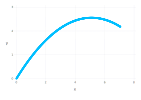

In [37]:
plot(x=x,y=y, Theme(highlight_width=0pt))

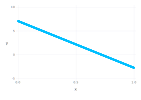

In [38]:
plot(x=t,y=vy,Theme(highlight_width=0pt))

## But what about Air Resistence?  

Real objects encou

In [8]:
y

1001-element Array{Float64,1}:
 0.0       
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 ⋮         
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107
 0.00707107